In [3]:
from google.colab import files
uploaded = files.upload()

Saving bank-additional-full.csv to bank-additional-full (1).csv
Saving bank-additional.csv to bank-additional (1).csv
Saving bank-full.csv to bank-full (1).csv
Saving bank.csv to bank.csv


In [4]:
import pandas as pd
df_bank = pd.read_csv('bank.csv',sep = ';')
df_bank_full = pd.read_csv('bank-full.csv',sep = ';')
df_bank_additional = pd.read_csv('bank-additional.csv',sep = ';')
df_bank_additional_full = pd.read_csv('bank-additional-full.csv',sep = ';')

In [8]:
df_bank.shape,df_bank_full.shape,df_bank_additional.shape,df_bank_additional_full.shape

((4521, 17), (45211, 17), (4119, 21), (41188, 21))

In [10]:
# Splitting the full data into test and train data to avoid inherent biases in models
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_bank_full.iloc[:,0:-1],df_bank_full.iloc[:,-1] , test_size=0.2, random_state=42)

In [11]:
X_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
3344,41,blue-collar,married,primary,no,849,yes,no,unknown,15,may,72,1,-1,0,unknown
17965,49,technician,married,primary,no,1415,yes,no,cellular,30,jul,269,2,-1,0,unknown
18299,42,admin.,married,secondary,no,3842,no,no,cellular,31,jul,130,4,-1,0,unknown
10221,37,management,single,tertiary,no,-119,yes,no,unknown,11,jun,375,11,-1,0,unknown
32192,56,blue-collar,married,primary,no,3498,no,no,cellular,15,apr,264,2,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,44,housemaid,single,primary,no,1059,no,no,unknown,18,jun,2093,1,-1,0,unknown
44732,23,student,single,tertiary,no,508,no,no,cellular,8,sep,210,1,92,1,failure
38158,34,technician,divorced,tertiary,no,1317,yes,no,cellular,15,may,239,1,-1,0,unknown
860,33,retired,married,secondary,no,165,no,no,unknown,7,may,111,1,-1,0,unknown


In [21]:
y_train.value_counts()

no     31970
yes     4198
Name: y, dtype: int64

Text(0, 0.5, 'Class')

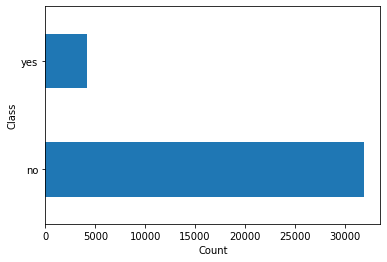

In [29]:
# Plotting Bar Charts for Yes/No counts 
import matplotlib.pyplot as plt
y_train.value_counts().plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Class')

In [31]:
df_merged = pd.merge(X_train, y_train, left_index=True, right_index=True)

In [35]:
#Analysing Job categories
X_train['job'].value_counts()

blue-collar      7806
management       7500
technician       6096
admin.           4137
services         3350
retired          1815
self-employed    1286
entrepreneur     1178
unemployed       1023
housemaid        1002
student           742
unknown           233
Name: job, dtype: int64

Text(0, 0.5, 'Job')

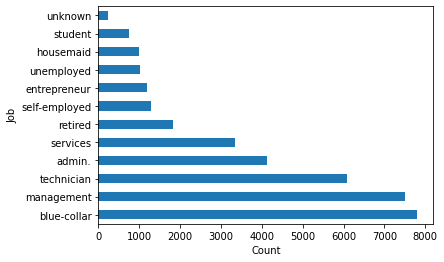

In [36]:
#Analysing Job categories
X_train['job'].value_counts().plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Job')

Text(0, 0.5, 'Marital')

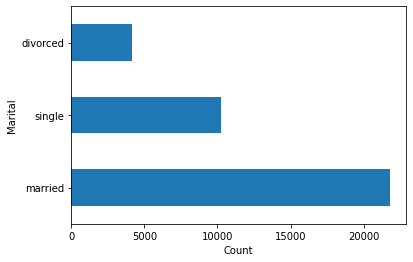

In [37]:
#Analysing Marital categories
X_train['marital'].value_counts().plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Marital')

Text(0, 0.5, 'Education')

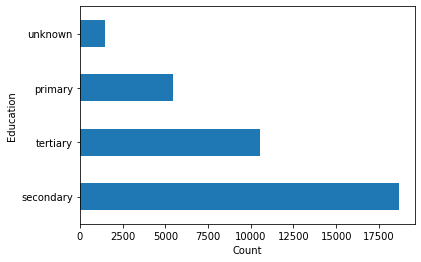

In [38]:
#Analysing education categories
X_train['education'].value_counts().plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Education')

Text(0, 0.5, 'Outcome of the previous marketing campaign')

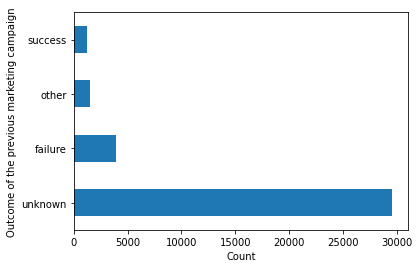

In [41]:
#Analysing Outcome of the previous marketing campaign  categories
X_train['poutcome'].value_counts().plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Outcome of the previous marketing campaign')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4d64279350>,
      dtype=object)

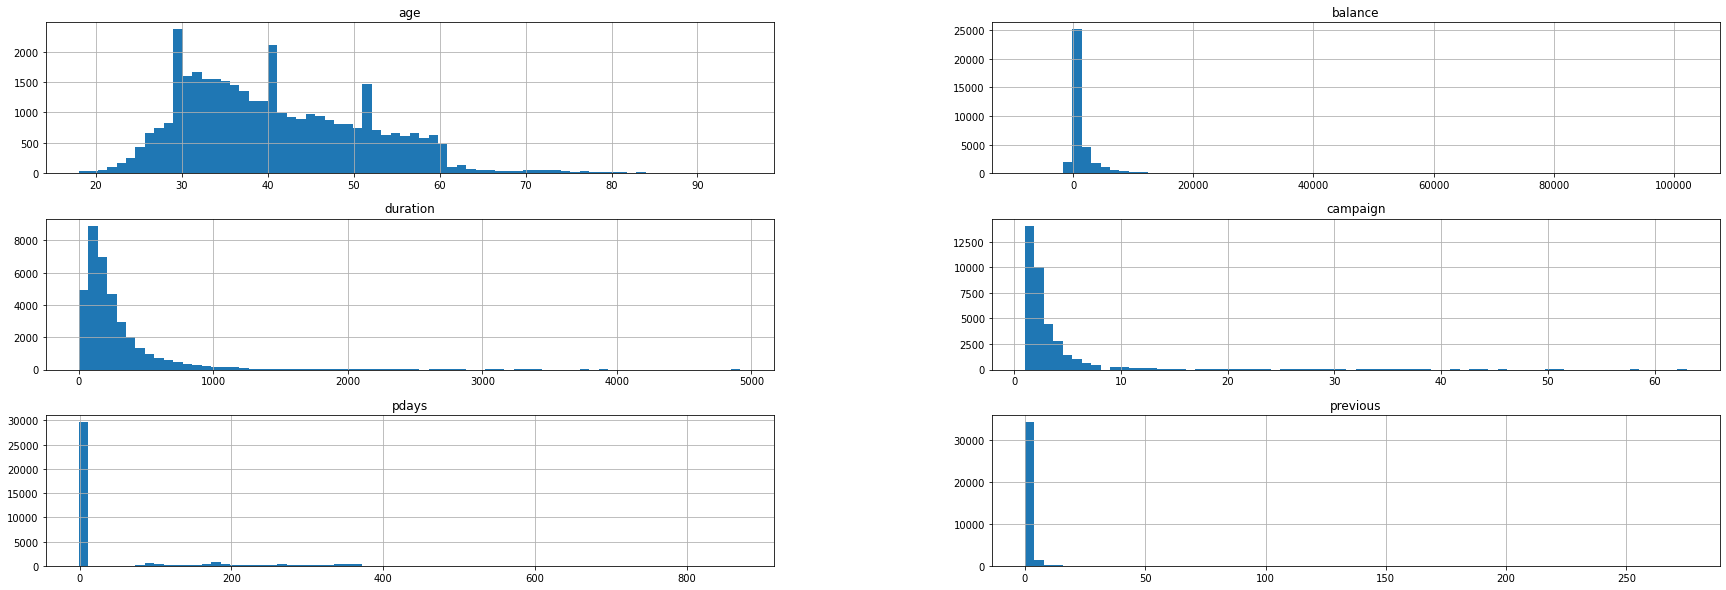

In [55]:
# Univariate Analysis
X_train.hist(column = ['age','balance','duration','campaign','pdays','previous'],figsize = (30,10),bins = 70)

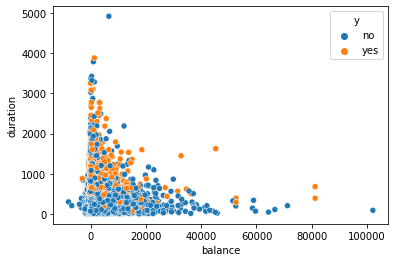

In [33]:
import seaborn as sns
sns.scatterplot(x=df_merged['balance'],y=df_merged['duration'],hue =df_merged['y'])